## Определение тональности текста отзывов на фильмы IMDB с помощью сети GRU

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

Можно менять следующие гиперпараметры для улучшения работы нейронной сети:
* Длину окна свертки (поробуйте 3, 5, 7 и 9).
* Количество карт признаков в сверточном слое.
* Длину вектора представления слов в слое Embedding.
* Количество слоев.
* Количествой нейронов в полносвязном слое для классификации.
* Параметр Dropout
* Тип оптимизатора (adam, rmsprop и др.)
* Количество эпох обучения.
* Размер мини-выборки.

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Загружаем данные

In [ ]:
max_words=10000

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

## Подготовка данных для обучения

In [ ]:
maxlen = 200

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
x_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39, 8921, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5, 5938,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112, 7062,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

## Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5773 - loss: 0.6593 - val_accuracy: 0.8312 - val_loss: 0.3841
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8726 - loss: 0.3040 - val_accuracy: 0.8560 - val_loss: 0.3653
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9075 - loss: 0.2378 - val_accuracy: 0.8608 - val_loss: 0.3504
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9320 - loss: 0.1853 - val_accuracy: 0.8600 - val_loss: 0.3542
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9452 - loss: 0.1536 - val_accuracy: 0.8608 - val_loss: 0.3646
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9523 - loss: 0.1357 - val_accuracy: 0.8572 - val_loss: 0.3858
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9602 - loss: 0.1143 - val_accuracy: 0.8504 - val_loss: 0.4004
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9638 - loss: 0.1068 - val_accuracy:

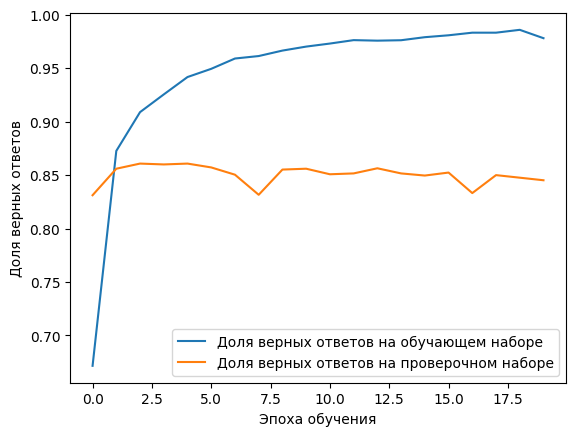

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8333 - loss: 0.6990


max_words = 10000; maxlen = 200; optimizer = "adam"; epochs = 20; batch_size = 128

---

Result for test data:

accuracy: 0.8333 - loss: 0.6990

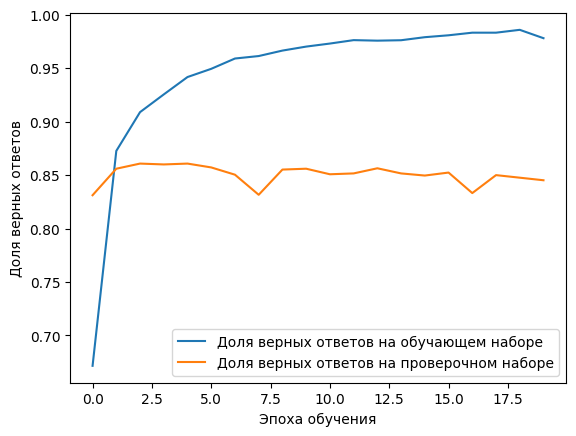

max_words = 10000; maxlen = 300; optimizer = "adam"; epochs = 20; batch_size = 128

---

Result for test data:

accuracy: 0.8380 - loss: 0.6856

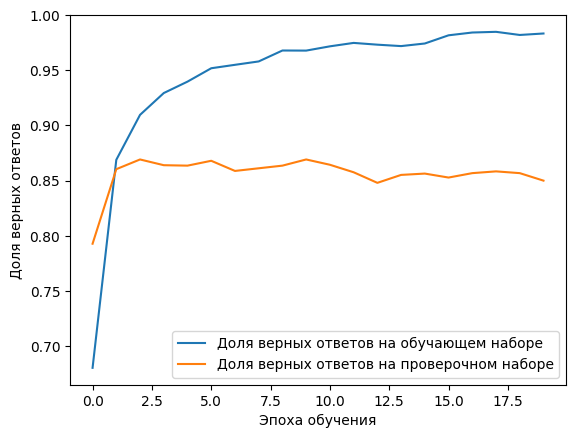

max_words = 10000; maxlen = 200; optimizer = "rmsprop"; epochs = 20; batch_size = 128

---

Result for test data:

accuracy: 0.8537 - loss: 0.4158

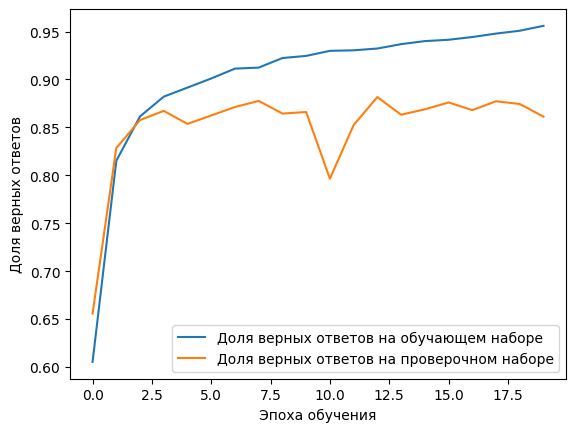

max_words = 10000; maxlen = 200; optimizer = "rmsprop"; epochs = 30; batch_size = 128

---

Result for test data:

accuracy: 0.8570 - loss: 0.4654

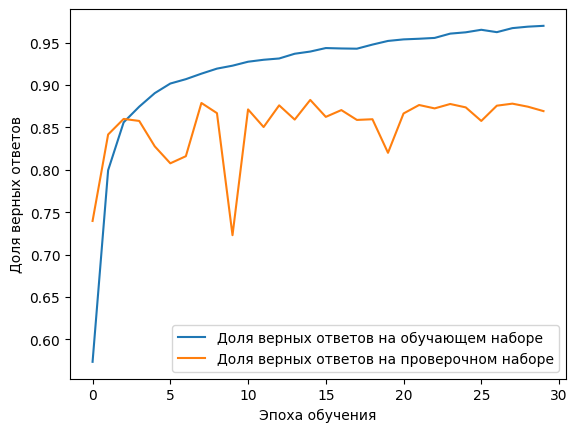

## Архитектуры нейронных сетей для анализа текстов

1. [Определение тональности отзывов на фильмы из базы IMDB с помощью простых рекуррентных нейросетей](https://colab.research.google.com/drive/19RAxAnIV0fDXAcE1T23TPkzi4ZPFQXdB).
2. [Определение тональности отзывов на фильмы из базы IMDB с помощью сетей LSTM](https://colab.research.google.com/drive/1FQjetRIkWYxmm87JKUbVSJrRS2vNLPpV).
3. [Определение тональности отзывов на фильмы из базы IMDB с помощью сетей GRU](https://colab.research.google.com/drive/1IGJPwFkTdpbyagQ5jiIRJBA01xlfc18t).